# How Can Students' Performance Be Affected by Certain Factors?

### Students study hard to achieve academic success. Receiving high scores on their final exams can be used to measure each student's academic performance. This project explores how specific factors affect and relate to that performance.

Before we dive into creating predictions, let's look at the detail of our dataset.

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score


df = pd.read_csv("StudentPerformanceFactors.csv")
df = df.rename(columns={"Hours_Studied": "studying_hours", 
                    "Attendance": "attendance",
                    "Sleep_Hours": "sleep_hours",
                    "Previous_Scores": "midterm_exam_score",
                    "Tutoring_Sessions": "tutoring_sessions",
                    "Physical_Activity": "physical_activity_hours",
                    "Exam_Score": "final_exam_score"
                    })
df.head()

,studying_hours,attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,sleep_hours,midterm_exam_score,Motivation_Level,Internet_Access,tutoring_sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,physical_activity_hours,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,final_exam_score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


From our dataset, we have twenty different factors that are related to the student performance.

However, in this project, we will only focus on following factors:

* features
    - `studying_hours`: the number of hours spent studying per week
    - `attendance`: a percentage of classes attended
    - `sleep_hours`: an average number of hours of sleep per night
    - `midterm_exam_score`: a score of the midterm exam
    - `tutoring_sessions`: a number of tutoring sessions attended per month
    - `physical_activity_hours`: an average number of hours of physical activity per week

* target
    - `final_exam_score`: a score of the final exam

Therefore, we will simplify our original dataset.

In [190]:
"""
Focus on certain factors
"""
student_performance_simplified = df[["studying_hours", "attendance", "sleep_hours", "midterm_exam_score", "tutoring_sessions", "physical_activity_hours"]]
final_exam_score = df["final_exam_score"]

In [191]:
display(student_performance_simplified.head())
display(student_performance_simplified.describe())
student_performance_simplified.info()

,studying_hours,attendance,sleep_hours,midterm_exam_score,tutoring_sessions,physical_activity_hours
0,23,84,7,73,0,3
1,19,64,8,59,2,4
2,24,98,7,91,2,4
3,29,89,8,98,1,4
4,19,92,6,65,3,4


,studying_hours,attendance,sleep_hours,midterm_exam_score,tutoring_sessions,physical_activity_hours
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   studying_hours           6607 non-null   int64
 1   attendance               6607 non-null   int64
 2   sleep_hours              6607 non-null   int64
 3   midterm_exam_score       6607 non-null   int64
 4   tutoring_sessions        6607 non-null   int64
 5   physical_activity_hours  6607 non-null   int64
dtypes: int64(6)
memory usage: 309.8 KB


### How these factors have a relationship with final exam scores?

Let's create some plots that can visualize the relationship between a certain factor with the `final_exam_score`

Index(['studying_hours', 'attendance', 'sleep_hours', 'midterm_exam_score',
       'tutoring_sessions', 'physical_activity_hours'],
      dtype='object')


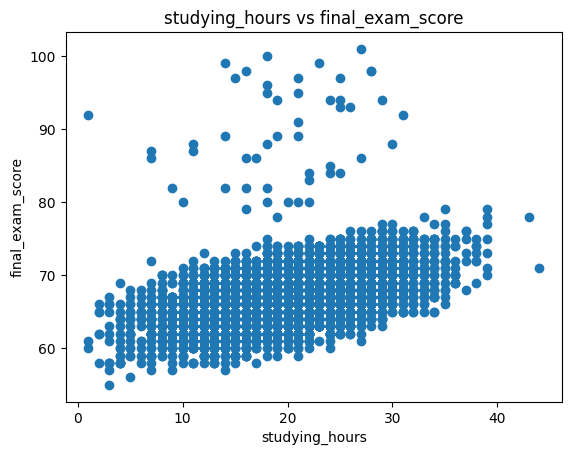

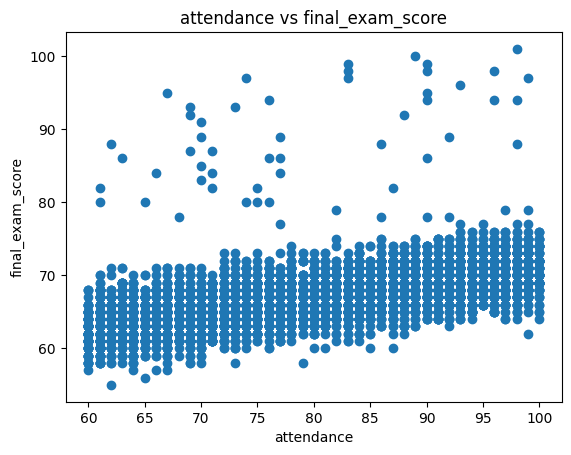

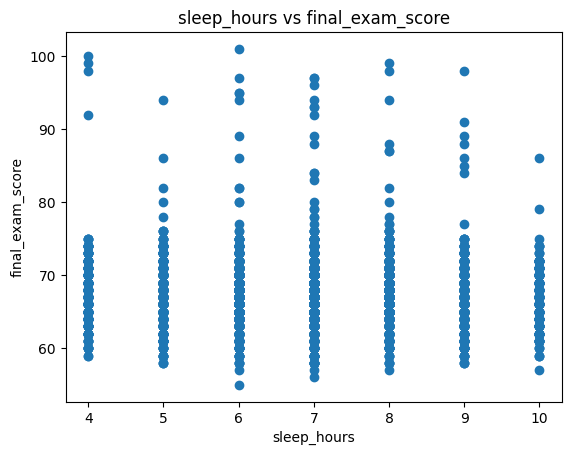

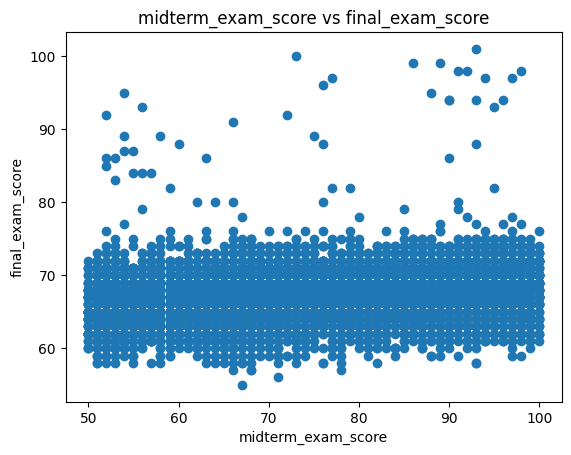

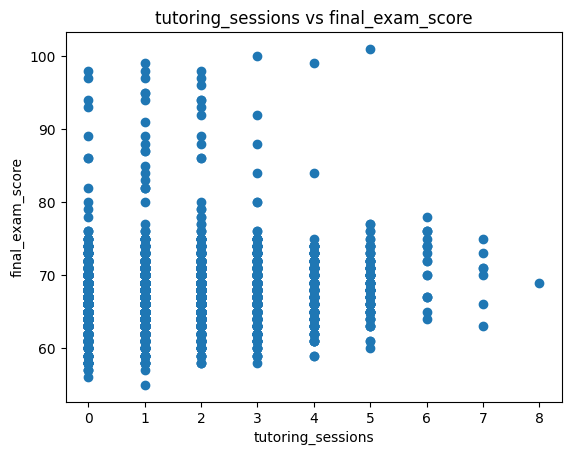

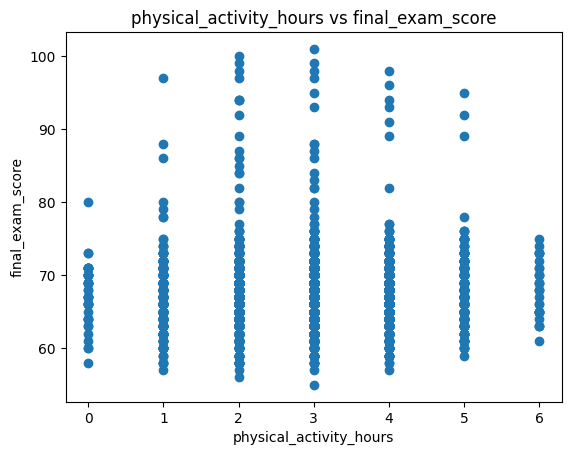

In [192]:
features = student_performance_simplified.columns
print(features)

for feature in features:
    plt.scatter(student_performance_simplified[feature], final_exam_score)
    plt.title(f"{feature} vs final_exam_score")
    plt.xlabel(feature)
    plt.ylabel("final_exam_score")
    plt.show()


### Let's split the data into train/test sets!

By using the powerful machine learning tool, `scikit-learn`, we can split our dataset into train and test sets.

* `X`: factors that will use to predict the final exam score (features)
* `Y`: a "final_exam_score" (target)
* `train_test_split`: create train and test sets
    - `test_size`: the proportion of the test set (20% of the full dataset will be used in test set)
    - `random_state`: set to 42 -> it's like a seed number when creating a random number generator (will give a same result while calling "train_test_split")

In [193]:
X = student_performance_simplified
Y = final_exam_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Create a Multiple Linear Regression Model

Now we can use the `scikit-learn`'s `LinearRegression` to create a linear regression model.

We fit the model with our training set (`X_train` and `Y_train`).

By using `.fit()`, we can do the fitting process with using training set.

* `model.intercept_`: an intercept term of our fitted model
* `model.coef_`: optimal model parameters of our fitted model

In [194]:
model = lm.LinearRegression()
model.fit(X_train, Y_train)

print("Intercept:", model.intercept_)
print()
print("Coefficients:", pd.Series(model.coef_, index=X.columns))

Intercept: 40.97457017291114

Coefficients: studying_hours             0.289269
attendance                 0.198667
sleep_hours               -0.033519
midterm_exam_score         0.048211
tutoring_sessions          0.509866
physical_activity_hours    0.151104
dtype: float64


### Create our prediction, $\hat{Y}$

Evaluate our model by using `.predict` to get our prediction, $\hat{Y}$. We check how good our model's prediction with $R^{2}$ score and Root Mean Squared Error (RMSE).

In [195]:
Y_hat = model.predict(X_test)
print("R² Score:", r2_score(Y_test, Y_hat))
print("RMSE:", root_mean_squared_error(Y_test, Y_hat))
print("Std of y_test:", np.std(Y_test))

R² Score: 0.6416391364668392
RMSE: 2.2506569657653466
Std of y_test: 3.7596638776698867


Since our $R^{2}$ score is 0.641..., which means roughly 64% of the variance in students' final exam scores based on input factors. We can say our model is a moderate fit which means the model's prediction is not bad but need to be improved to create more accurate predictions.

The Root Mean Squared Error (RMSE) of our model gives 2.250...., and since our standard deviation of the test set is 3.75.., which is greater than RMSE. This states that our model creates better prediction than just guessing the average. 

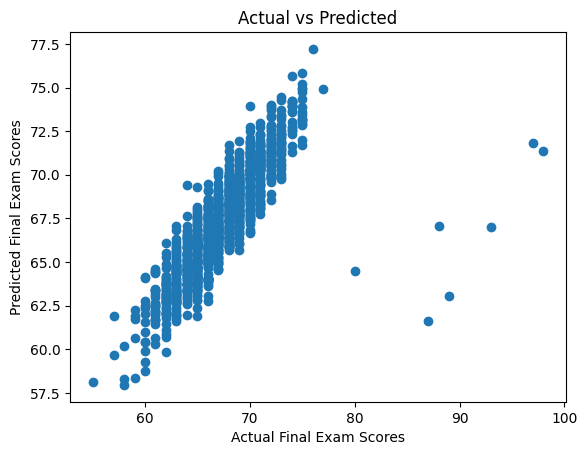

In [196]:
plt.scatter(Y_test, Y_hat)
plt.xlabel("Actual Final Exam Scores")
plt.ylabel("Predicted Final Exam Scores")
plt.title("Actual vs Predicted")
plt.show()

### Create a residual plot to evaluate our model's performance

Let's check our model's residual plot. If the residual plot shows a pattern, it means our model does not perform well.

We first subtract our prediction (Y_hat) from our test set to get residuals. Then we plot these datapoints by using scatterplot.

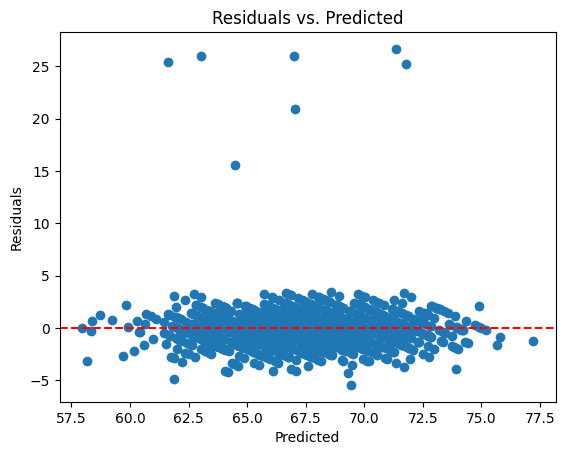

In [197]:
residuals = Y_test - Y_hat
plt.scatter(Y_hat, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted")
plt.show()

Our residual plot shows that most residuals are randomly distributed around zero, which supports the assumption of linearity. However, there are a few notable outliers, which may indicate unusual data points or missing predictive variables that could improve the model.